In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [11]:
# mobiles dataset
mobiles_data_info = pd.read_csv('mob_data.csv')


In [13]:
mobiles_data_info.columns

Index(['Price_in_Rupees', 'Off(%)', 'Ram', 'Rom', 'Expandable_GB/TB',
       'Screen_in_inch', 'Secondary_Camera(MP)', 'Battery_details',
       'Warranty(Year)', 'Rating', 'Dual_sim_num'],
      dtype='object')

In [16]:
mobiles_data_info.drop(mobiles_data_info.columns[1], axis=1, inplace=True)

In [20]:
column_names = mobiles_data_info.columns.tolist()
column_names

['Price_in_Rupees',
 'Ram',
 'Rom',
 'Expandable_GB/TB',
 'Screen_in_inch',
 'Secondary_Camera(MP)',
 'Battery_details',
 'Warranty(Year)',
 'Rating',
 'Dual_sim_num']

In [21]:
mobiles_data_info.to_csv('naresh.csv',index=False)

In [66]:
# Inspecting the dataset
# Two pandas functions make it very easy to take a first look at the dataset: DataFrame.describe() and 
# DataFrame.info().

In [67]:
# DataFrame.info()
# Print a concise summary of a DataFrame.
mobiles_data_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 10 columns):
Price_in_Rupees         696 non-null int64
Ram                     696 non-null int64
Rom                     696 non-null int64
Expandable_GB/TB        696 non-null int64
Screen_in_inch          696 non-null float64
Secondary_Camera(MP)    696 non-null int64
Battery_details         696 non-null int64
Warranty(Year)          696 non-null int64
Rating                  696 non-null float64
Dual_sim_num            696 non-null int64
dtypes: float64(2), int64(8)
memory usage: 54.5 KB


In [68]:
# DataFrame.describe()
# Generates descriptive statistics that summarize the central tendency, dispersion and shape of 
# a dataset’s distribution, excluding NaN values.
mobiles_data_info.describe()

,Price_in_Rupees,Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,Dual_sim_num
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.0,696.000000,696.0
mean,12890.630747,4.172414,49.719828,215.202586,5.822284,10.847701,3517.564655,1.0,4.274425,1.0
std,9477.931826,5.457924,35.397158,112.435679,0.572944,7.139500,748.647891,0.0,0.266133,0.0
min,599.000000,1.000000,4.000000,2.000000,1.800000,0.000000,850.000000,1.0,3.000000,1.0
25%,6999.000000,2.000000,32.000000,128.000000,5.450000,5.000000,3000.000000,1.0,4.100000,1.0
50%,9799.000000,3.000000,32.000000,256.000000,6.000000,8.000000,3500.000000,1.0,4.350000,1.0
75%,15490.000000,4.000000,64.000000,256.000000,6.270000,16.000000,4000.000000,1.0,4.400000,1.0
max,59999.000000,64.000000,256.000000,512.000000,6.700000,48.000000,5100.000000,1.0,5.000000,1.0


In [24]:
mobiles_data_info.shape

(696, 10)

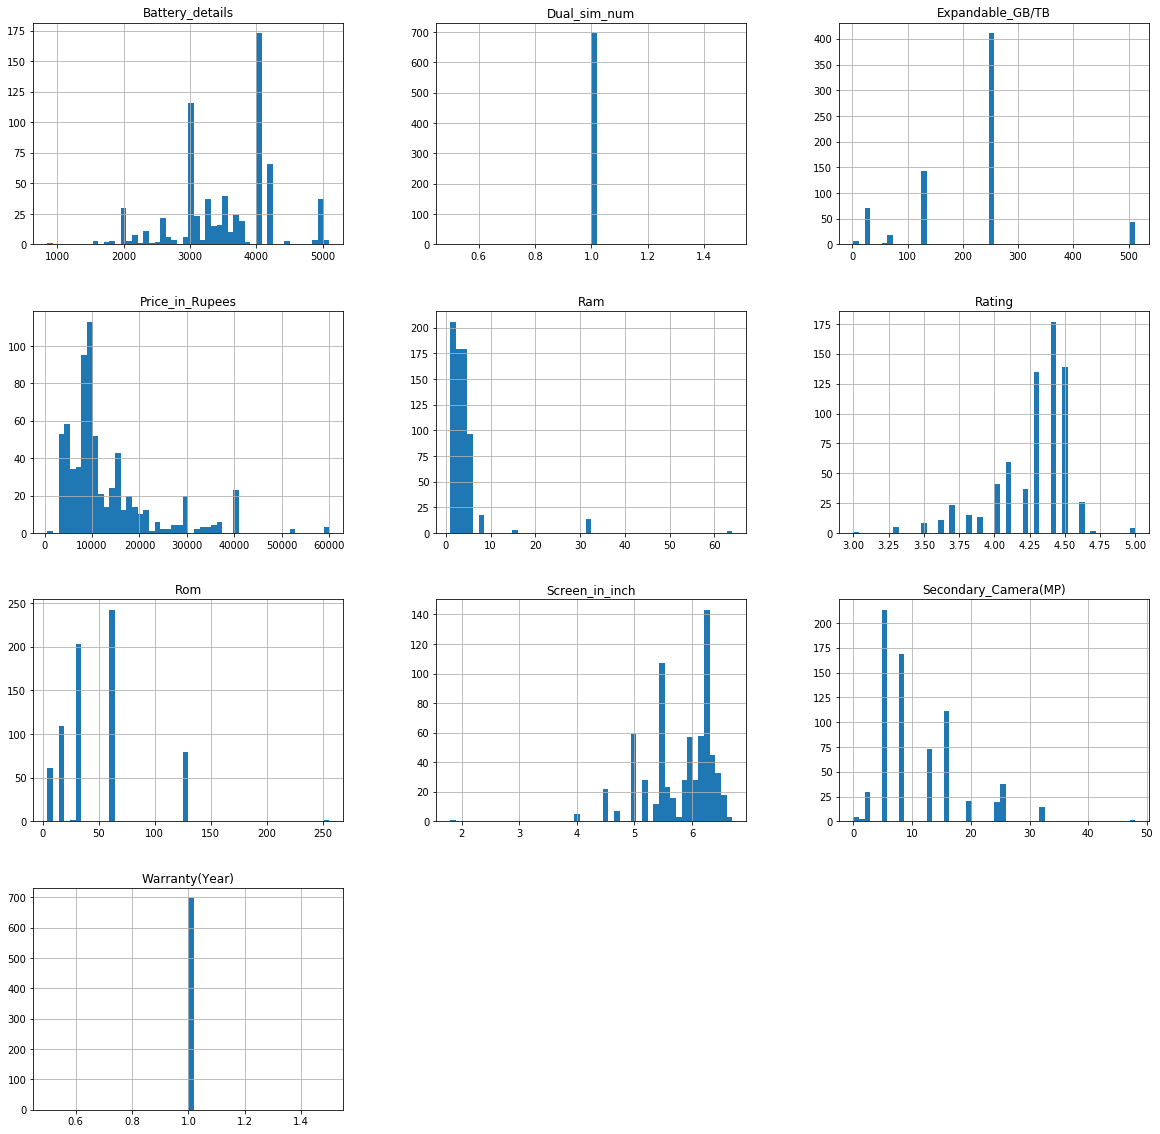

In [27]:
# Visualizing aspects of the dataset
#A histogram is a graphical representation of data that uses bars of different heights.
# DataFrame.hist() calls matplotlib.pyplot.hist() on each series in the DataFrame, resulting in 
# one histogram per column (i.e. one histogram per attribute).

mobiles_data_info.hist(bins=50, figsize=(20, 20))
plt.show()

In [71]:
# We can observe several things in these histograms:

# 1.Some entries have the "Expandable_GB", "Ram" etc.. attributes set to zero.
# As mentioned before, this indicates that certain values are missing.

In [32]:
# Removing duplicated data points.

# To make sure that none of the data point are duplicated and hence overrepresented,
# we can scan the dataset for duplicated entries and delete them. 
# This becomes very easy with the DataFrame.drop_duplicates()function.
# mobiles_data_info.drop_duplicates(keep='first', inplace=True)

In [33]:
mobiles_data_info.shape

(696, 10)

In [34]:
# Creating a test set.
# If you want to train a machine learning model on your data 
# it's important that you create a separate test set BEFORE you do any further preprocessing. 
# The test set is put aside and not looked at, 
# it's sole purpose is to allow for an evaluation of the trained classifier.


original_train_mob, test_mob = train_test_split(mobiles_data_info, test_size=0.2)

# To be sure we will create a copy for further processing
train_mob = original_train_mob.copy()

In [35]:
original_train_mob.shape

(556, 10)

In [36]:
test_mob.shape

(140, 10)

In [37]:
556+140

696

In [38]:
# Gaining further insight.

# To further improve our understanding of the dataset, we can add a few more exploration steps.
# Besides creating more plots,
# another useful thing is looking for correlations between the attributes.

# We can easily compute Pearson's correlation coefficient between every pair of attributes using DataFrame.corr(). 
# In fact,DataFrame.corr() could also be used to compute the Kendall Tau correlation coefficient or 
# Spearman rank correlation.

correlation_matrix = train_mob.corr(method='pearson')

correlation_matrix

,Price_in_Rupees,Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,Dual_sim_num
Price_in_Rupees,1.000000,0.562419,0.598946,0.194998,0.268465,0.325195,0.220896,NaN,0.485286,NaN
Ram,0.562419,1.000000,0.291971,0.104642,-0.030944,0.157022,0.130432,NaN,0.242780,NaN
Rom,0.598946,0.291971,1.000000,0.408298,0.520371,0.504896,0.365270,NaN,0.537165,NaN
Expandable_GB/TB,0.194998,0.104642,0.408298,1.000000,0.558868,0.480582,0.315846,NaN,0.531394,NaN
Screen_in_inch,0.268465,-0.030944,0.520371,0.558868,1.000000,0.513373,0.676660,NaN,0.649759,NaN
Secondary_Camera(MP),0.325195,0.157022,0.504896,0.480582,0.513373,1.000000,0.305279,NaN,0.418405,NaN
Battery_details,0.220896,0.130432,0.365270,0.315846,0.676660,0.305279,1.000000,NaN,0.460078,NaN
Warranty(Year),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,0.485286,0.242780,0.537165,0.531394,0.649759,0.418405,0.460078,NaN,1.000000,NaN
Dual_sim_num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Let's take a look at how each attribute correlates with the final diagnosis

correlation_matrix["Price_in_Rupees"].sort_values()


Expandable_GB/TB        0.194998
Battery_details         0.220896
Screen_in_inch          0.268465
Secondary_Camera(MP)    0.325195
Rating                  0.485286
Ram                     0.562419
Rom                     0.598946
Price_in_Rupees         1.000000
Warranty(Year)               NaN
Dual_sim_num                 NaN
Name: Price_in_Rupees, dtype: float64

In [40]:
# The highest correlation exists for the attribute "Ram" but none of these correlations are very high.
# However, it's important that we keep in mind that Pearson's only measures linear correlations.
# Nonlinear correlations are not measured and might still exist!
mobiles_data_info.columns

Index(['Price_in_Rupees', 'Ram', 'Rom', 'Expandable_GB/TB', 'Screen_in_inch',
       'Secondary_Camera(MP)', 'Battery_details', 'Warranty(Year)', 'Rating',
       'Dual_sim_num'],
      dtype='object')

In [41]:

# Handling missing data
# To make sure that we don't mistake missing values as being 0, we will replace them with 
# 'NaN' (short for "not a number"). We need to handle missing values in 
# the columns 'Price_in_Rupees', 'Off(%)', 'Ram', 'Rom', 'Expandable_GB/TB', 'Screen_in_inch' ,'Secondary_Camera(MP)'
# 'Battery_details','Warranty(Year)','Rating','Dual_sim_num'
# and 'age'.

names = ['Ram', 'Rom', 'Expandable_GB/TB', 'Screen_in_inch', 'Secondary_Camera(MP)', 'Battery_details', 'Warranty(Year)','Rating','Dual_sim_num']

for name in names:
    train_mob[name].replace(0, np.nan, inplace=True)


In [42]:
train_mob.head(100)

,Price_in_Rupees,Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,Dual_sim_num
680,39990,32,64,512,5.50,24.0,4000,1,4.4,1
320,9999,3,32,256,6.30,13.0,4000,1,4.4,1
202,20990,6,64,256,6.50,16.0,4000,1,4.5,1
221,7499,3,64,256,5.45,5.0,3000,1,4.4,1
481,7999,3,32,128,5.20,8.0,4000,1,4.1,1
285,8999,3,32,256,6.21,32.0,4000,1,4.2,1
408,15490,4,64,512,6.40,16.0,4000,1,4.4,1
235,26600,4,64,256,5.70,16.0,3300,1,4.4,1
321,11999,4,64,256,6.26,20.0,4000,1,4.5,1
144,4799,1,16,128,5.00,5.0,3000,1,4.3,1


In [45]:
# Missing attribute values can be handled in several ways. For example we can.

# Delete or ignore the data points with missing values
# Replace the missing values, for example with the median of the corresponding attribute
# Remove the entire attribute from the dataset.

# We will stick to the second option. This means that we first compute the median of each attribute.
# In a second step we replace missing values with the corresponding attribute median, using DataFrame.fillna().


Ram_median = train_mob["Ram"].median()
Rom_median = train_mob["Rom"].median()
Expandable_median = train_mob["Expandable_GB/TB"].median()
Screen_in_inch_median = train_mob["Screen_in_inch"].median()
Secondary_Camera_median = train_mob["Secondary_Camera(MP)"].median()
Battery_details_median = train_mob["Battery_details"].median()
Warranty_median = train_mob['Warranty(Year)'].median()
Rating_median = train_mob['Rating'].median()
Dual_sim_num_median = train_mob['Dual_sim_num'].median()


train_mob["Ram"].fillna(Ram_median, inplace=True)
train_mob["Rom"].fillna(Rom_median, inplace=True)
train_mob["Expandable_GB/TB"].fillna(Expandable_median, inplace=True)
train_mob["Screen_in_inch"].fillna(Screen_in_inch_median, inplace=True)
train_mob["Secondary_Camera(MP)"].fillna(Secondary_Camera_median, inplace=True)
train_mob["Battery_details"].fillna(Battery_details_median, inplace=True)
train_mob["Warranty(Year)"].fillna(Warranty_median, inplace=True)
train_mob["Rating"].fillna(Rating_median, inplace=True)
train_mob["Dual_sim_num"].fillna(Dual_sim_num_median, inplace=True)

In [46]:
train_mob.head()

,Price_in_Rupees,Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,Dual_sim_num
680,39990,32,64,512,5.50,24.0,4000,1,4.4,1
320,9999,3,32,256,6.30,13.0,4000,1,4.4,1
202,20990,6,64,256,6.50,16.0,4000,1,4.5,1
221,7499,3,64,256,5.45,5.0,3000,1,4.4,1
481,7999,3,32,128,5.20,8.0,4000,1,4.1,1


In [47]:
train_mob.shape

(556, 10)

In [48]:
# Encoding categorial attributes

# Copy original dataframe and add new column with random fitness values
temp_mob = train_mob.copy()
mobile_value = ["bad", "moderate", "good", "very good",]
temp_mob['mobile_value'] = np.random.choice(mobile_value, temp_mob.shape[0])

temp_mob.head(5)

,Price_in_Rupees,Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,Dual_sim_num,mobile_value
680,39990,32,64,512,5.50,24.0,4000,1,4.4,1,very good
320,9999,3,32,256,6.30,13.0,4000,1,4.4,1,very good
202,20990,6,64,256,6.50,16.0,4000,1,4.5,1,bad
221,7499,3,64,256,5.45,5.0,3000,1,4.4,1,good
481,7999,3,32,128,5.20,8.0,4000,1,4.1,1,very good


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
mobile_value_encoded = encoder.fit_transform(temp_mob["mobile_value"])

for id_, class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")

print()
print(f"Encoded fitness values for first 10 entries: {mobile_value_encoded[:10]}")


class id 0 has label bad
class id 1 has label good
class id 2 has label moderate
class id 3 has label very good

Encoded fitness values for first 10 entries: [3 3 0 1 3 2 3 3 2 1]


In [66]:
temp_mob.head()

,Price_in_Rupees,Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,Dual_sim_num,mobile_value
680,39990,32,64,512,5.50,24.0,4000,1,4.4,1,very good
320,9999,3,32,256,6.30,13.0,4000,1,4.4,1,very good
202,20990,6,64,256,6.50,16.0,4000,1,4.5,1,bad
221,7499,3,64,256,5.45,5.0,3000,1,4.4,1,good
481,7999,3,32,128,5.20,8.0,4000,1,4.1,1,very good


In [67]:
# Rescaling or standardizing attributes

from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

temp1_mob = train_mob.copy()
column_names = temp1_mob.columns.tolist()

# transform all attributes
temp1_mob[column_names] = mm_scaler.fit_transform(temp1_mob[column_names])

temp1_mob.sort_index(inplace=True)
temp1_mob.head()


,Price_in_Rupees,Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,Dual_sim_num
2,0.141263,0.031746,0.466667,0.498039,0.755102,0.225806,0.576471,0.0,0.65,0.0
4,0.158266,0.031746,0.066667,0.498039,0.693878,0.129032,0.505882,0.0,0.60,0.0
5,0.154899,0.031746,0.066667,0.498039,0.693878,0.129032,0.505882,0.0,0.60,0.0
6,0.154882,0.031746,0.066667,0.498039,0.693878,0.129032,0.505882,0.0,0.70,0.0
7,0.158266,0.000000,0.066667,0.058824,0.653061,0.129032,0.369412,0.0,0.40,0.0


In [68]:

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

temp2_mob = train_mob.copy()

# transform all attributes
temp2_mob[column_names] = mm_scaler.fit_transform(temp2_mob[column_names])
temp2_mob.sort_index(inplace=True)
temp2_mob.head()

,Price_in_Rupees,Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,Dual_sim_num
2,0.141263,0.031746,0.466667,0.498039,0.755102,0.225806,0.576471,0.0,0.65,0.0
4,0.158266,0.031746,0.066667,0.498039,0.693878,0.129032,0.505882,0.0,0.60,0.0
5,0.154899,0.031746,0.066667,0.498039,0.693878,0.129032,0.505882,0.0,0.60,0.0
6,0.154882,0.031746,0.066667,0.498039,0.693878,0.129032,0.505882,0.0,0.70,0.0
7,0.158266,0.000000,0.066667,0.058824,0.653061,0.129032,0.369412,0.0,0.40,0.0


In [69]:
temp2_mob['Price_in_Rupees'].head()

2    0.141263
4    0.158266
5    0.154899
6    0.154882
7    0.158266
Name: Price_in_Rupees, dtype: float64

In [70]:
mobiles_data_info['Price_in_Rupees'].head()

0     5999
1     5999
2     8990
3    10000
4    10000
Name: Price_in_Rupees, dtype: int64

In [71]:
temp2_mob.to_csv("mobiles_prep_data.csv",index=False)

In [72]:
mob_info=pd.read_csv('mobiles_prep_data.csv')

In [73]:
mob_info.columns

Index(['Price_in_Rupees', 'Ram', 'Rom', 'Expandable_GB/TB', 'Screen_in_inch',
       'Secondary_Camera(MP)', 'Battery_details', 'Warranty(Year)', 'Rating',
       'Dual_sim_num'],
      dtype='object')

In [74]:
x = mob_info[['Ram','Rom','Expandable_GB/TB','Screen_in_inch','Secondary_Camera(MP)','Battery_details','Warranty(Year)','Rating','Dual_sim_num']]
y = mob_info.Price_in_Rupees

In [75]:
X_train,X_test,y_train,y_test = train_test_split(x,y ,test_size=0.2,random_state=7)

In [76]:
X_train.shape

(444, 9)

In [77]:
X_test.shape

(112, 9)

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr_model = LinearRegression()

In [80]:
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
prediction=lr_model.predict(X_test)

In [82]:
print("Train result:", lr_model.score(X_train, y_train))
print("Test result:", lr_model.score(X_test, y_test))

Train result: 0.5954237463572952
Test result: 0.4277555842014272


In [83]:
from sklearn import metrics

In [84]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction))) 

Mean Absolute Error: 0.07683911649896491
Mean Squared Error: 0.015077200876223287
Root Mean Squared Error: 0.12278925391182767


In [85]:
#to check accuracy 
metrics.r2_score(y_test,prediction)

0.42775558420142723

In [86]:
# to check accuracy 
lr_model.fit(X_train,y_train)
accuracy = lr_model.score(X_test,y_test)

print(accuracy*100,'%')

42.775558420142715 %


In [87]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})

In [88]:
df1=df.head(31)

In [90]:
df1

,Actual,Predicted
357,0.491582,0.663418
30,0.276094,0.406034
330,0.494798,0.440056
351,0.663300,0.200007
115,0.124428,0.101751
339,0.208603,0.167742
492,0.137205,0.141435
289,0.141414,0.261649
101,0.132845,0.170630
378,0.124579,0.132339


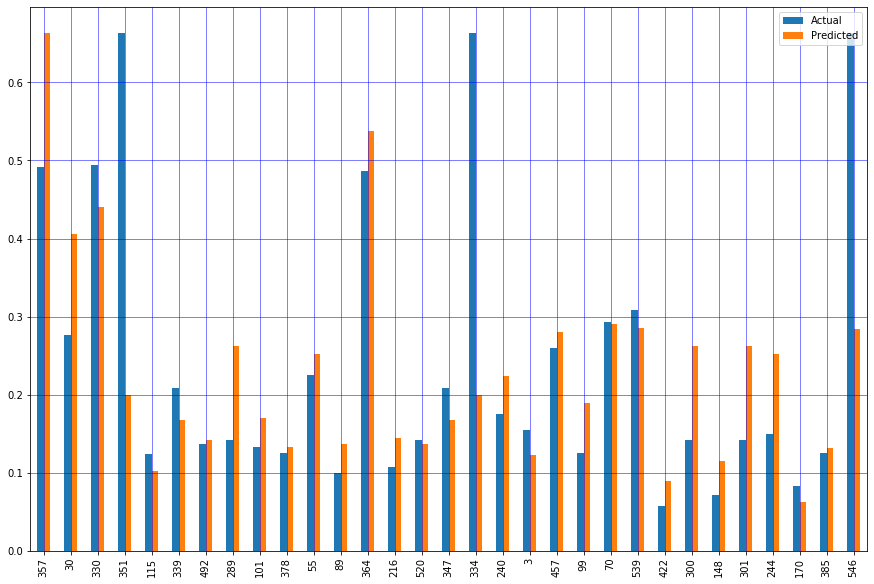

In [89]:
df1.plot(kind='bar',figsize=(15,10))
plt.grid(linewidth='0.5', color='green')
plt.grid(linewidth='0.5', color='blue')
plt.show()